# System of linear equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

$x_1 - 2x_2 = -1$ 
<br>
$-x_1 + 3x_2 = 3$

In [2]:
A = np.array([[1, -2], [-1, 3]])
b = np.array([-1, 3])
x = np.linalg.solve(A, b)

In [3]:
def line_plot(a,b,c):
    x = np.linspace(-5,5,100)
    y = (a*x - c)/(-b)
    plt.plot(x,y)

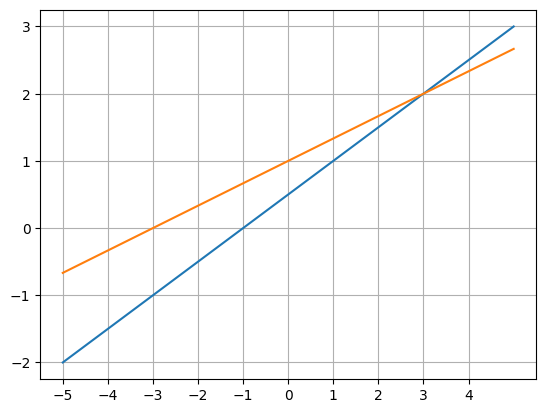

In [4]:
line_plot(1,-2,-1)
line_plot(-1,3,3)
plt.xticks(np.arange(-5,5,1))
plt.grid()
plt.show()

The sec mentioned in all exercises in the paranteces are the part in the book for reading and better understanding.

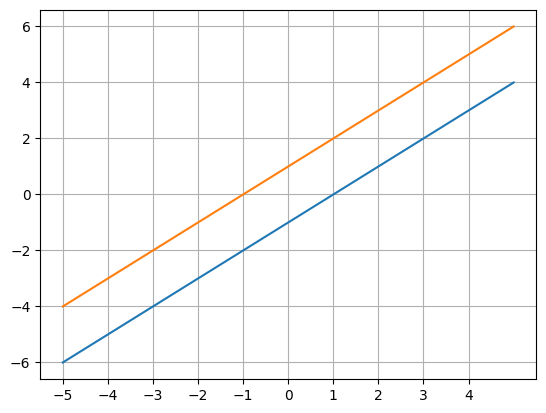

In [5]:
# Exercise 1.1

#The system of equations is as follows:
# x1 - x2 = 1
# x1 - x2 = -1

line_plot(1, -1, 1)
line_plot(1, -1, -1)

plt.xticks(np.arange(-5,5,1))
plt.grid()
plt.show()

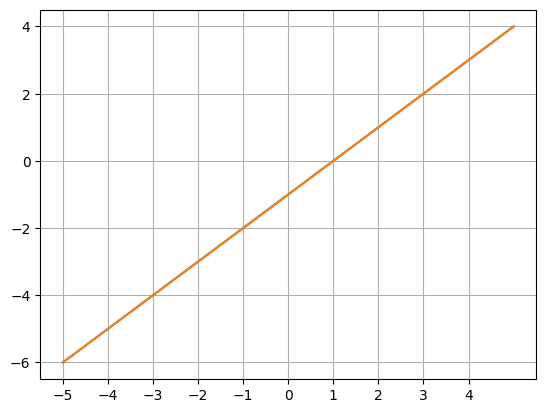

In [6]:
# Task 1.2

#The system of linear equations is as follows:
# x1 - x2 = 1
# 2x1 - 2x2 = -2

line_plot(1, -1, 1)
line_plot(2, -2, 2)

plt.xticks(np.arange(-5,5,1))
plt.grid()
plt.show()

# Exercise 1

- Write down a system of linear equations with two variables with no solution. Plot the corresponding lines. (sec. 1.1 fig. 2.a)
- Write down a system of linear equations with two variables with infinitely many solutions. Plot the corresponding lines. (sec. 1.1 fig. 2.b)


In [7]:
#%matplotlib widget

In [8]:
def plane_plot(a,b,c,d,ax):
    x = np.linspace(-3,3,10)
    y = np.linspace(-3,3,10)

    X,Y = np.meshgrid(x,y)
    if c == 0:
        c = 1
    Z = (d - a*X - b*Y) / c
    ax.quiver(0, 0, 0, 0, -3, 0, 
     arrow_length_ratio=0.1,color='r')
    ax.quiver(0, 0, 0, 3, 0, 0, 
     arrow_length_ratio=0.1,color='r')
    ax.quiver(0, 0, 0, 0, 0, 3, 
     arrow_length_ratio=0.1,color='r')
    surf = ax.plot_surface(X, Y, Z,alpha=0.5)

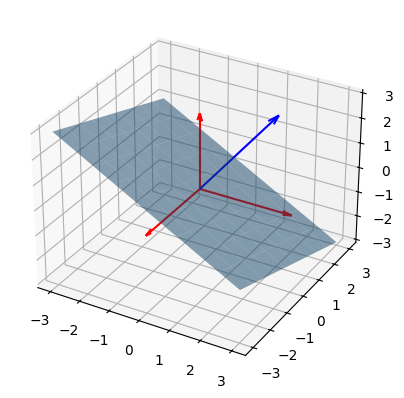

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plane_plot(2,1,3,0,ax)
ax.quiver(0, 0, 0, 2, 1, 3, 
     arrow_length_ratio=0.1,color='b')

In [10]:
A = np.array([[1, -2, 1], [0,2,-8],[5,0,-5]])
b = np.array([0,8,10])
x = np.linalg.solve(A, b)
print(x)

[ 1.  0. -1.]


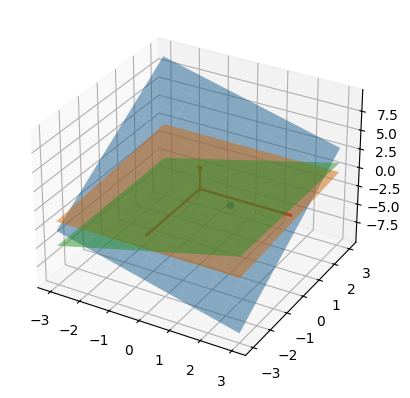

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plane_plot(1,-2,1,0,ax)
plane_plot(0,2,-8,8,ax)
plane_plot(5,0,-5,10,ax)
ax.scatter(1,0,-1)

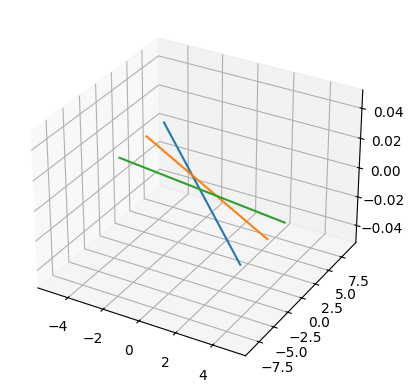

In [12]:
#Exercise 2.1 
plane1 = (1,-2,1)
plane2 = (0,2,-8)
plane3 = (5,0,-5)

cross1_2 = np.cross(plane1, plane2)
cross1_3 = np.cross(plane1, plane3)
cross2_3 = np.cross(plane2, plane3)

a1, b1, c1 = cross1_2
a2, b2, c2 = cross1_3
a3, b3, c3 = cross2_3

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
line_plot(a1, b1, c1)
line_plot(a2, b2, c2)
line_plot(a3, b3, c3)

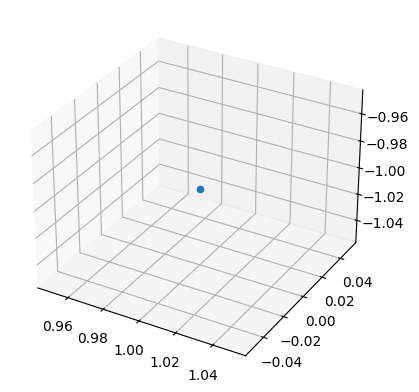

In [13]:
#Exersice 2.2
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(1,0,-1)

# Exercise 2

- Plot the intersecting lines of the planes, since you have three planes and every plane cuts the other ones, you should plot three intersecting lines (Sec 1.1, ex 1)
- plot the solution as a point in the same 3D space (Sec 1.1, ex 1)

# Row reduction and Echelon forms

In [14]:
import sympy

In [15]:
A.shape

(3, 3)

In [16]:
extended_A = np.concatenate((A,np.reshape(b,(-1,1))),axis=1)

In [17]:
sympy.Matrix(extended_A).rref()

(Matrix([
 [1, 0, 0,  1],
 [0, 1, 0,  0],
 [0, 0, 1, -1]]),
 (0, 1, 2))

# Linear dependence and Independence

If all $c'$s are zero, a set of vectors $\{v_1,v_2,...,v_n\}$ is said to be linearly independet if, the following equation holds.

$c_1v_1 + c_2v_2 + ... c_nv_n = \mathbf0$

If any of $c_i\neq0$, the set of vectors is linearly dependent.



In [18]:
#Exersice 3.1
matr = np.array([
    [1, 4, 2, 0],
    [2, 5, 1, 0],
    [3, 6, 0, 0]
    ])

sympy.Matrix(matr).rref()
# Since one of the rows in our system after we reached rref, we know that one of the rows are linearly dependent on one of the other ones.

(Matrix([
 [1, 0, -2, 0],
 [0, 1,  1, 0],
 [0, 0,  0, 0]]),
 (0, 1))

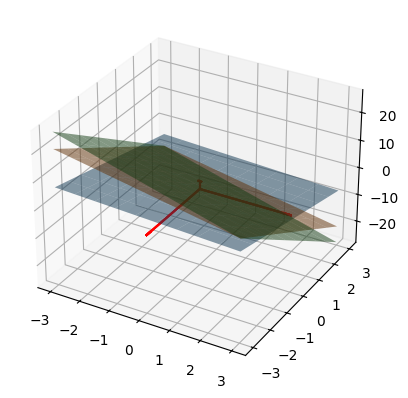

In [19]:
#Exersice 3.2
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
plane_plot(1, 4, 2, 0, ax)
plane_plot(2, 5, 1, 0, ax)
plane_plot(3, 6, 0, 0, ax)

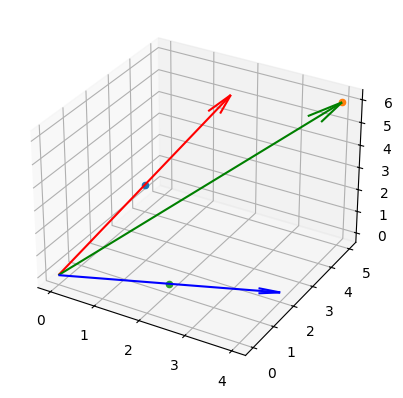

In [20]:
#Exersice 3.3 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(1,2,3)
ax.scatter(4,5,6)
ax.scatter(2,1,0)

ax.quiver(0, 0, 0, 2, 4, 6, 
     arrow_length_ratio=0.1,color='r')  #This vector is lengthed for visualization
ax.quiver(0, 0, 0, 4, 5, 6, 
     arrow_length_ratio=0.1,color='g')
ax.quiver(0, 0, 0, 4, 2, 0, 
     arrow_length_ratio=0.1,color='b')  #This vector is lengthed for visualization

# The positive span is the pyramid space inbetween the three vectors. We can reach any point within this space with the help of linear combinations of the three vectors. 
# No space outside the "pyramid" can be reached with the help of linear combiations of our three vectors. 

(Matrix([
[1, 0, -2, 0],
[0, 1,  1, 0],
[0, 0,  0, 0]]), (0, 1))


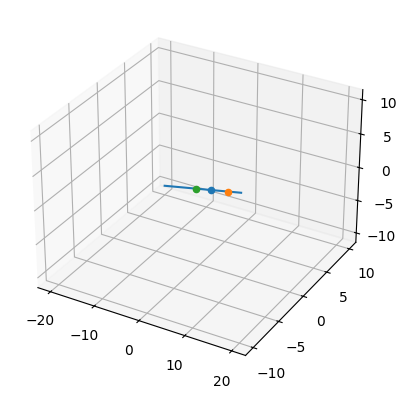

In [21]:
#Exersice 3.4
matr = np.array([
    [1, 4, 2, 0],
    [2, 5, 1, 0],
    [3, 6, 0, 0]
    ])

reduced = sympy.Matrix(matr).rref()
print(reduced)

#(v2 --> v2 - 2v1)
#(v3 --> v3 -3v1)
#(v3 --> v3 - 2v2)
#These operations makes the last row be all zeros. 

#The third variable in our augmented matrix is a free variable. 
#The function if this variable is the same as the basic variables, which means that the crossing of the basic variables is the same as our third variable. f(x_free) = x_basic
# We can describe x1 as = 2x3 and x2 as = -x3. With this we can find x1 and x2 with varying values of x3 and find the line that crosses the points that appear. 


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(6, -3, 3) #x3 = 3
ax.scatter(14, -7, 7) #x3 = 7
ax.scatter(-2, 1, -1) #x3 = -1

ax.plot([20, -20], [-10, 10], [10, -10])

# Exercise 3

- Determine if the following vectors are linearly independent. (Sec 1.7 ex.1)

$v_1=[1,2,3]^T$     
$v_2=[4,5,6]^T$    
$v_3=[2,1,0]^T$

- Plot the three corresponding planes, and justify your answer visually
- Plot three corresponding vectors and visualize the span of them and justify your asnwer visually
- If they are lineary dependent, express one of them in terms of the others and visualize

# Exercise 4    
- write down a system of linear equations with three variables with no solution (2 planes), plot the corresponding planes, and calculate the Echelon form. (Chapter ex 27)
- write down a system of linear equations with three variables with infinitely many solution (2 planes), plot the corresponding planes, and calculate the Echelon form.

(Matrix([
 [1, 1, 1, 0],
 [0, 0, 0, 1]]),
 (0, 3))

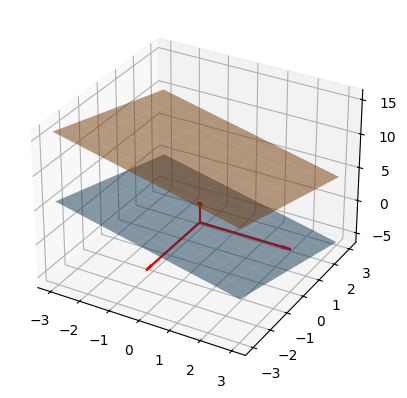

In [22]:
#Exersice 4.1       
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plane_plot(1, 1, 1 , 0, ax)
plane_plot(1, 1, 1, 10, ax)

matr = np.array([
    [1, 1, 1, 0],
    [1, 1, 1, 10]])

sympy.Matrix(matr).rref()

#The equations are as follows:
# x1 + x2 + x3 = 0
# x1 + x2 + x3 = 10
# This system has two planes who do not intersect, therefore the system has no solutions. 

(Matrix([
 [1, 1, 1, 1],
 [0, 0, 0, 0]]),
 (0,))

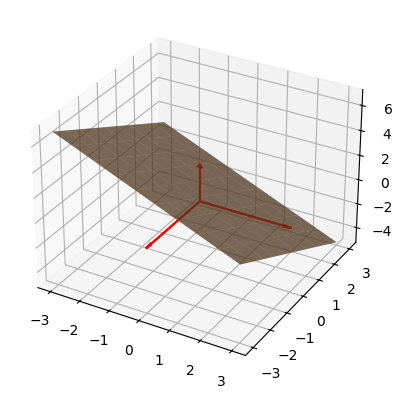

In [23]:
#Exersice 4.1
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plane_plot(1, 1, 1, 1, ax)
plane_plot(2, 2, 2, 2, ax)

matr = np.array([
    [1, 1, 1, 1],
    [2, 2, 2, 2]])

sympy.Matrix(matr).rref()

#The equations are as follows:
# x1 + x2 + x3 = 1
# 2x1 + 2x2 + 2x3 = 2
#This system has two planes who hace infinitely many solutions, since the equations can be expressed by each other. Therefore the system has infinitely many solutions. 

# Exercise 5 (chapter 1, section 1.6, ex 4) 
## example 1 from the same section helps you prepare solving this exercise

Suppose an economy has four sectors, Agriculture (A), Energy (E), Manufacturing (M), and Transportation (T). Sector A sells 10% of its output to E and 25% to M and retains the rest. Sector E sells 30% of its output to A, 35% to M, and 25% to T and retains the rest. Sector M sells 30% of its output to A, 15% to E, and 40% to T and retains the rest. Sector T sells 20% of its output to A, 10% to E, and 30% to M and retains the rest.


- Construct the exchange table for this economy.
- Find a set of equilibrium prices for the economy using Python

In [24]:
#Exersice 5.1
exchange_table = np.array([
    [65, 30, 30, 20],   #A
    [10, 10, 15, 10],  #E
    [25, 35, 15, 30],  #M
    [0, 25, 40, 40]   #T
])
     #A  #E  #M  #T

#Exersice 5.2
equlibrium = np.array([0, 0, 0, 0])
result = np.linalg.solve(exchange_table, equlibrium)
print(f"Result: \n {result}")

aug_exchange_table = np.array([
    [65, 30, 30, 20, 0],   #A
    [10, 10, 15, 10, 0],  #E
    [25, 35, 15, 30, 0],  #M
    [0, 25, 40, 40, 0]   #T
])
     #A  #E  #M  #T

sympy.Matrix(aug_exchange_table).rref()

# This situation suggests that the existing production and consumption patterns are already sufficient to satisfy both internal needs and external demands

Result: 
 [ 0.  0. -0. -0.]


(Matrix([
 [1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0]]),
 (0, 1, 2, 3))

# Exercise 6 (chapter 1, section 1.6, ex 13)
## Example 2 from the same section helps you prepare solving this exercise

Assuming that the flow must be in the directions indicated, find the minimum flows in the branches denoted by x2, x3, x4, and x5.

<img src="traffic flow.png" width=200 height=200 />

In [25]:
#Exesice 6
# A x2 + 30 = x1 + 80
# B x3 + x5 = x2 + x4
# C x6 + 100 = x5 + 40
# D x4 + 40 = x6 + 90
# E x1 + 60 = x3 + 20

# A x1 - x2                    =-50
# B     x2 - x3 + x4 - x5     =  0
# C                    x5 -x6 =  60
# D               x4      -x6 =  50
# E x1      -x3                =-40

aug_matrix = np.array([[1, -1, 0, 0, 0, 0, -50], #A
                       [0, 1, -1, 1, -1, 0, 0],  #B 
                       [0, 0, 0, 0, 1, -1, 60],  #C
                       [0, 0, 0, 1, 0, -1, 50],  #D
                       [1, 0, -1, 0, 0, 0, -40]])#E

sympy.Matrix(aug_matrix).rref()


# From this we can find that x3 and x6 is free variables

# General solution:
# x1 = x3 - 40
# x2 = x3 + 10
# x4 = x6 + 50
# x5 = x6 + 60


#Answer, minumum flow is when all of our variables have the minumum possible value without anyone of them being negative.
#For this to be true our free variables, x3 need to be equal to 40, and x6 need to be equal to 0 as we can see in the general solution. 
# This gives the following values for the basic variable: x1 = 0, x2 = 50, x4= 50, x5= 60.

(Matrix([
 [1, 0, -1, 0, 0,  0, -40],
 [0, 1, -1, 0, 0,  0,  10],
 [0, 0,  0, 1, 0, -1,  50],
 [0, 0,  0, 0, 1, -1,  60],
 [0, 0,  0, 0, 0,  0,   0]]),
 (0, 1, 3, 4))

# Exercise 7 (chapter 1, section 1.6, ex 5)

Boron sulfide reacts violently with water to form boric acid and hydrogen sulfide gas (the smell of rotten eggs). The unbalanced equation is

$B_2S_3 + H_2O -> H_3BO_3 + H_2S$

[For each compound, construct a vector that lists the numbers of atoms of boron, sulfur, hydrogen, and oxygen.]

Find the balanced version of the equation using Python.


In [26]:
# Exersice 7
         #B  S  H  O
#B2S3 =  [2, 3, 0, 0]
#H2O =   [0, 0, 2, 1]
#H3BO3 = [1, 0, 3, 3]
#H2S =   [0, 1, 2, 0]

# B2S3 + H2O = H3BO3 + H2S
# B2S3 + H2O - H3BO3 - H2S = 0

aug_matrix = np.array([[2, 0, -1, 0, 0], 
                       [3, 0, 0, -1, 0], 
                       [0, 2, -3, -2, 0], 
                       [0, 1, -3, 0, 0]])

sympy.Matrix(aug_matrix).rref()


# based on this, we see that x4 is a free variable. This menas that the general solution is as follows:
# x1 = 1/3 x4
# x2 = 2 x4
# x3 = 2/3 x4
# x4 is free

#when x4 = 1, then x1 = 1 * 1/3, x2 = 2, and x3 = 1 * 2/3
# wich gives the balanced equations as follows: 1/3 * B2S3 + 2 * H2O --> 2/3 * H3BO3 + H2S
#to not have fractions of molicules, we can just multiply the equation by 3.

# x4 is oxygen and is what detemines the balance of the reaction. If x4 = 0, all other varaibles are also 0 and there is no reaction. 
# Therefore there is an unlimited ammount of balanced equations depending on the value of x4.

(Matrix([
 [1, 0, 0, -1/3, 0],
 [0, 1, 0,   -2, 0],
 [0, 0, 1, -2/3, 0],
 [0, 0, 0,    0, 0]]),
 (0, 1, 2))

# Exercise 8
Write down Gaussian eliminatiton algorithm yourself and use it to solve the following equation (sec 1.2 row-reduction and back-subsitution)

$ x_1 + \sqrt(2)x_2 = \sqrt(3)$ 

$ \sqrt(3)x_1 + (\sqrt(6)+10^-3)x_2 = \sqrt(3)$

In [27]:
# #Exersice 8
import math

def gaussian_elimination(matrix):
    rows, cols = matrix.shape

    # Ensure matrix is in float format to handle divisions
    matrix = matrix.astype(float)

    for pivot_row in range(rows):
        # Check if the pivot element is zero
        if matrix[pivot_row, pivot_row] == 0:
            # Find a non-zero row below and interchange
            non_zero_rows = np.where(matrix[pivot_row+1:, pivot_row] != 0)[0]
            if non_zero_rows.size > 0:
                non_zero_row = non_zero_rows[0] + pivot_row + 1
                matrix[[pivot_row, non_zero_row]] = matrix[[non_zero_row, pivot_row]]
            else:
                # No non-zero row found, skip this column
                continue

        # Make the pivot element 1
        pivot_value = matrix[pivot_row, pivot_row]
        matrix[pivot_row, :] /= pivot_value

        # Eliminate other entries in the pivot column
        for other_row in range(rows):
            if other_row != pivot_row:
                factor = matrix[other_row, pivot_row]
                matrix[other_row, :] -= factor * matrix[pivot_row, :]

    return back_substitution(matrix)

def back_substitution(matrix):
    rows, cols = matrix.shape
    x = np.zeros(cols-1)  # Initialize the solution vector

    for i in range(rows-1, -1, -1):
        if matrix[i, i] == 0:
            # Handle division by zero 
            x[i] = np.nan  # Set to NaN (Not a Number) as an example
        else:
            x[i] = matrix[i, -1] / matrix[i, i]
            for j in range(i-1, -1, -1):
                matrix[j, -1] -= matrix[j, i] * x[i]

    return x

test = np.array([[1, math.sqrt(2), math.sqrt(3)], 
                 [math.sqrt(3), (math.sqrt(6) + (10**-3)), math.sqrt(3)]])

res = gaussian_elimination(test)
print(res) 

[ 1794.88299514 -1267.94919243]


# Roundoff error

# Exercise 9  (sec 1.2 numerical note)


1- Use built-in Python linear equation solver to solve the equation from exercise 8

2- Compare the solution and reason about the roudoff error

In [28]:
A = np.array([[1, math.sqrt(2)], 
                 [math.sqrt(3), (math.sqrt(6) + (10**-3))]])

b = np.array([math.sqrt(3), math.sqrt(3)])

result = np.linalg.solve(A, b)
print(result)

# In our testing, the built-in function gave us the same rounding as our own function. This might be determinded by numpy as a defaul value when handling complex numbers. 
# Since numbers such as the square root of 2 are infinite numbers, they can not be represented in their
# whole and must instead be rounded off. This gives us an imperfection in our algorithm, which is needed since the algorithm otherwise will not work. 
# The roundoff error consists of the difference between the actual and the rounded number that represents it. The more we round off a number, the more inaccurate the algorithm becomes
# when handling numbers such as the square root of 2. The more operations you then do with the rounded of representation of the unrepresentable number, the more the inaccuracy will
# propogate in the algorithm. 

[ 1794.88299514 -1267.94919243]
